In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()


### List of all US Bank Failures to 2000

The bfb1.csv file contains all US Bank failures from 2000 to May 2023. We import this data below.

In [3]:
bank_fail = pd.read_csv('bfb1.csv', encoding='windows-1252')
bank_fail.head()

,Bank Name,Closing Date,Approx. Asset (Millions),Approx. Deposit (Millions)
0,First Republic Bank,01-May-23,"$229,100.00","$103,900.00"
1,Signature Bank,12-Mar-23,"$110,400.00","$88,600.00"
2,Silicon Valley Bank,10-Mar-23,"$209,000.00","$175,400.00"
3,Almena State Bank,23-Oct-20,$70.00,$68.70
4,First City Bank of Florida,16-Oct-20,$134.70,$131.40


In [4]:
bank_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Bank Name                   564 non-null    object
 1   Closing Date                564 non-null    object
 2   Approx. Asset (Millions)    564 non-null    object
 3   Approx. Deposit (Millions)  564 non-null    object
dtypes: object(4)
memory usage: 17.8+ KB


- Let us store the column names in a vector cols:

In [6]:
cols = bank_fail.columns
cols

Index(['Bank Name', 'Closing Date', 'Approx. Asset (Millions)',
       'Approx. Deposit (Millions)'],
      dtype='object')

- We need to convert 'date' to an actual date, using datetime. We want to create a bar plot, and make a cummulative sum for each month from 2000 to 2023.

In [7]:
bank_fail['Date'] = pd.to_datetime(bank_fail[cols[1]], format='%d-%b-%y') 

In [9]:
bank_fail["Month"] = bank_fail.Date.dt.strftime('%m/%y')
bank_fail.head(10)

,Bank Name,Closing Date,Approx. Asset (Millions),Approx. Deposit (Millions),Date,Month
0,First Republic Bank,01-May-23,"$229,100.00","$103,900.00",2023-05-01,05/23
1,Signature Bank,12-Mar-23,"$110,400.00","$88,600.00",2023-03-12,03/23
2,Silicon Valley Bank,10-Mar-23,"$209,000.00","$175,400.00",2023-03-10,03/23
3,Almena State Bank,23-Oct-20,$70.00,$68.70,2020-10-23,10/20
4,First City Bank of Florida,16-Oct-20,$134.70,$131.40,2020-10-16,10/20
5,First State Bank,03-Apr-20,$152.40,$139.50,2020-04-03,04/20
6,Ericson State Bank,14-Feb-20,$100.90,$95.20,2020-02-14,02/20
7,City National Bank of New Jersey,01-Nov-19,$120.60,$111.20,2019-11-01,11/19
8,Resolute Bank,25-Oct-19,$27.10,$26.20,2019-10-25,10/19
9,Louisa Community Bank,25-Oct-19,$29.70,$26.50,2019-10-25,10/19


- Let us also deal with the assets and deposits. We want to convert those to numbers:

In [10]:
def convert_to_no(s):
    return float(s[1:].replace(',',''))

bank_fail['Approx. Asset (Millions)'] = bank_fail['Approx. Asset (Millions)'].apply(convert_to_no)
bank_fail['Approx. Deposit (Millions)'] = bank_fail['Approx. Deposit (Millions)'].apply(convert_to_no)
bank_fail.head()

,Bank Name,Closing Date,Approx. Asset (Millions),Approx. Deposit (Millions),Date,Month
0,First Republic Bank,01-May-23,229100.0,103900.0,2023-05-01,05/23
1,Signature Bank,12-Mar-23,110400.0,88600.0,2023-03-12,03/23
2,Silicon Valley Bank,10-Mar-23,209000.0,175400.0,2023-03-10,03/23
3,Almena State Bank,23-Oct-20,70.0,68.7,2020-10-23,10/20
4,First City Bank of Florida,16-Oct-20,134.7,131.4,2020-10-16,10/20


- Now, we create a new dataset bank_per_month, where we group banks by month.

In [12]:
bank_per_month = pd.DataFrame({'Month': [bank_fail["Month"][0]], 'Number': [1]})
bank_per_month

,Month,Number
0,05/23,1


In [13]:
bank_per_month = pd.DataFrame({'Month': [bank_fail["Month"][0]], 'Number': [1]})

bank_per_month["Number"][0] = 1
count_unique = 1

for j in range(1, 564):
    if bank_fail.Month[j] == bank_fail.Month[j-1]:
        bank_per_month.Number[count_unique-1] += 1
    else:
        bank_per_month.loc[count_unique] = [bank_fail.Month[j], 1]
        count_unique += 1

bank_per_month['Month'] = pd.to_datetime(bank_per_month['Month'], format='%m/%y') # convert 'date' to actual date
bank_per_month = bank_per_month.sort_values(['Month'])
# bank_per_month['Month'] = pd.DatetimeIndex(bank_per_month['Month']).normalize()
bank_per_month.head(10)

,Month,Number
119,2001-02-01,1
118,2001-05-01,1
117,2001-07-01,1
116,2001-09-01,1
115,2002-01-01,2
114,2002-02-01,2
113,2002-03-01,2
112,2002-06-01,2
111,2002-09-01,1
110,2002-11-01,1


- Note that the above dataset does not contain every single month from 2000 to 2023, so we create an artificial dataset fails which will contain all months:

In [14]:
fails = pd.DataFrame({'Month': pd.date_range(start="2000-10-01",end="2023-05-01", freq='MS'), 'Number': [0]*272})
fails.info()

fails = fails.set_index('Month')
fails2 = bank_per_month.set_index('Month')

# fails = pd.merge(fails, bank_per_month, on='Month')
#fails['Number'] = fails['Number_x'] + fails['Number_y']
#del fails['Number_x'] 
#del fails['Number_y']

fails = fails + fails2
fails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   272 non-null    datetime64[ns]
 1   Number  272 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2000-10-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  120 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [15]:
fails = fails.replace(to_replace = np.nan, value = 0)

In [16]:
fails = fails.reset_index()
fails.head()

,Month,Number
0,2000-10-01,0.0
1,2000-11-01,0.0
2,2000-12-01,0.0
3,2001-01-01,0.0
4,2001-02-01,1.0


In [17]:
fails['Month'] = pd.to_datetime(fails['Month'], format='%m/%y')

In [18]:
fails.head()

,Month,Number
0,2000-10-01,0.0
1,2000-11-01,0.0
2,2000-12-01,0.0
3,2001-01-01,0.0
4,2001-02-01,1.0


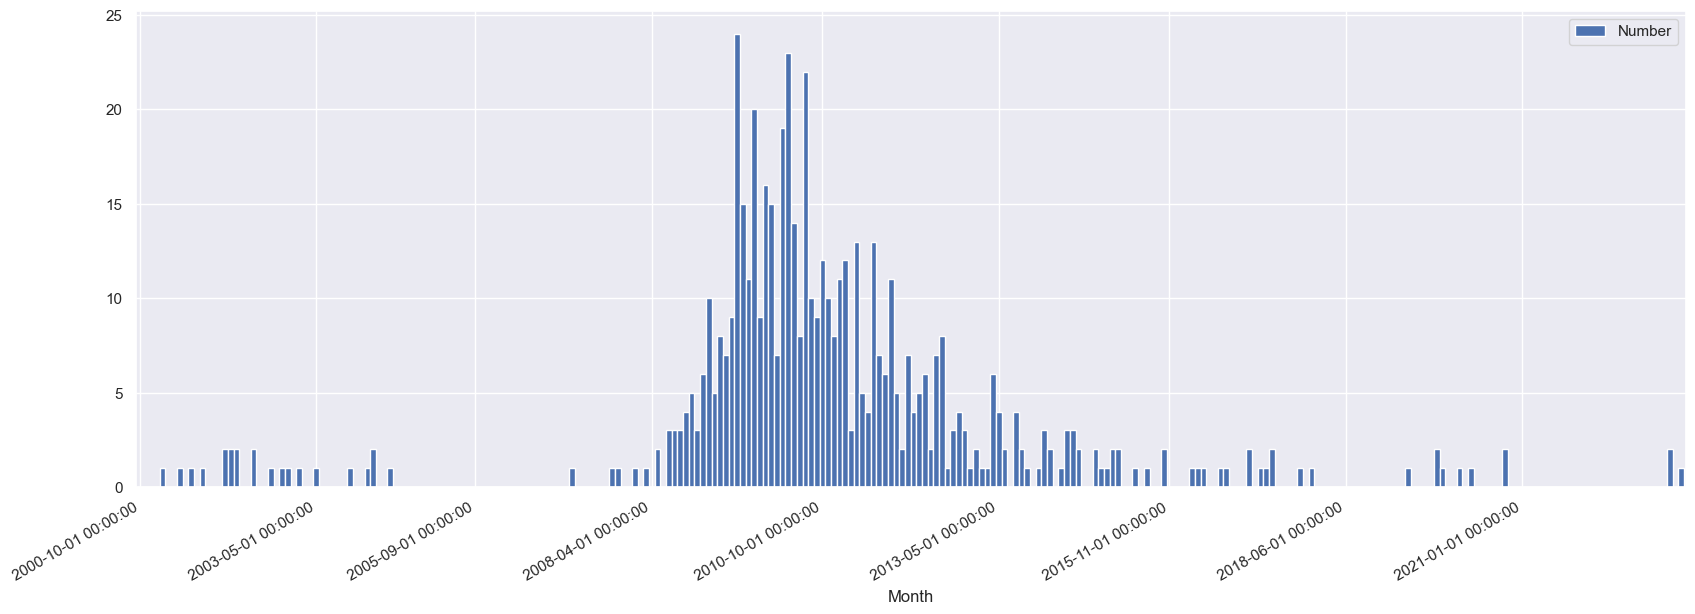

In [19]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(20, 7))

ax.xaxis.set_major_formatter(DateFormatter("%Y"))
fails.plot(ax = ax, x = 'Month', y = 'Number', kind='bar', width=1)

#plt.gca().invert_xaxis()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
plt.show()


- This looks good! We just need to play a bit with the x-axis labels.

In [20]:
idx = fails['Month']
fails = fails.set_index('Month')
fails.head()

,Number
Month,
2000-10-01,0.0
2000-11-01,0.0
2000-12-01,0.0
2001-01-01,0.0
2001-02-01,1.0


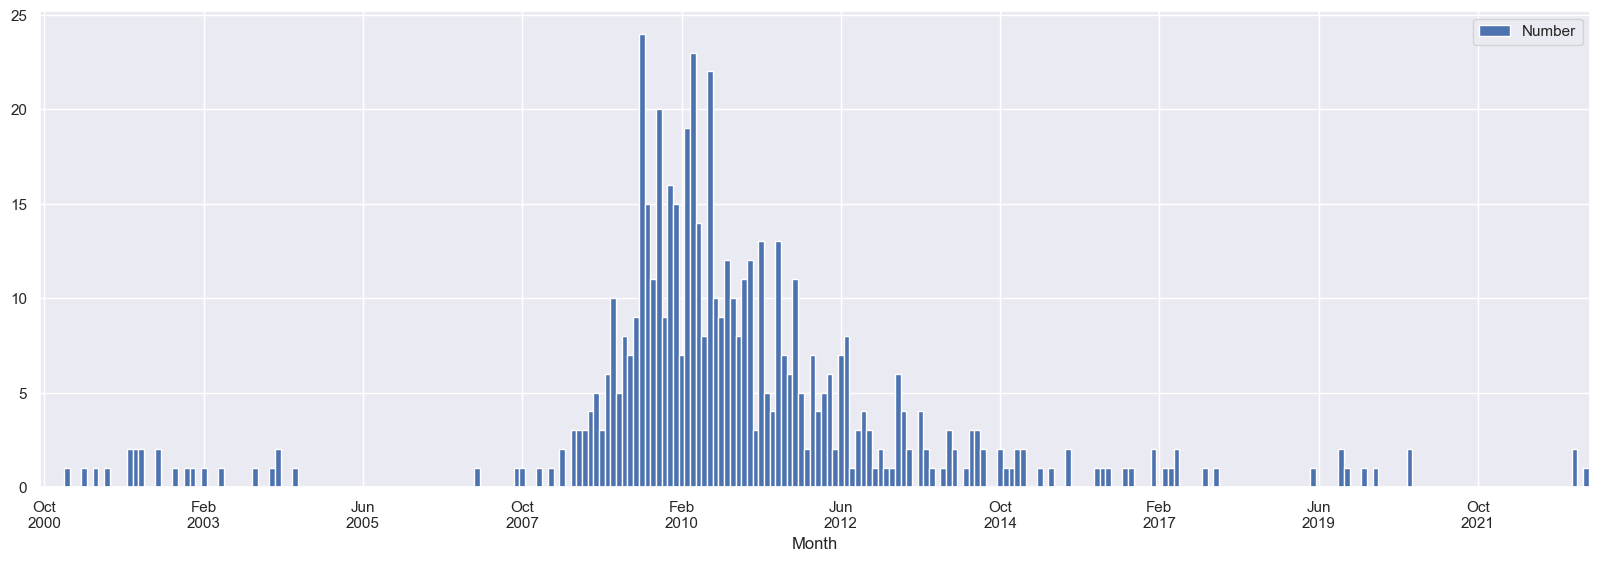

In [21]:
# Create pandas stacked bar chart
ax = fails.plot.bar(figsize=(20,7), width=1)

# Create list of monthly timestamps by selecting the first weekly timestamp of each
# month (in this example, the first Sunday of each month)
monthly_timestamps = [timestamp for idx, timestamp in enumerate(fails.index)
                      if (timestamp.month != fails.index[idx-1].month) | (idx == 0)]

# Automatically select appropriate number of timestamps so that x-axis does
# not get overcrowded with tick labels
step = 1
while len(monthly_timestamps[::step]) > 10: # increase number if time range >3 years
    step += 1
timestamps = monthly_timestamps[::step]

# Create tick labels from timestamps
labels = [ts.strftime('%b\n%Y') if ts.year != timestamps[idx-1].year
          else ts.strftime('%b') for idx, ts in enumerate(timestamps)]

# Set major ticks and labels
ax.set_xticks([fails.index.get_loc(ts) for ts in timestamps])
ax.set_xticklabels(labels)

# Set minor ticks without labels
ax.set_xticks([fails.index.get_loc(ts) for ts in monthly_timestamps], minor=True)

# Rotate and center labels
ax.figure.autofmt_xdate(rotation=0, ha='center')

- What about Assets of these banks??

In [22]:
bank_assets_month = pd.DataFrame({'Month': [bank_fail["Month"][0]], 'Assets': bank_fail['Approx. Asset (Millions)'][0], 'Deposits': bank_fail['Approx. Deposit (Millions)'][0]})

count_unique = 1

for j in range(1, 564):
    if bank_fail.Month[j] == bank_fail.Month[j-1]:
        bank_assets_month.Assets[count_unique-1] += bank_fail['Approx. Asset (Millions)'][j]
        bank_assets_month.Deposits[count_unique-1] += bank_fail['Approx. Deposit (Millions)'][j]
    else:
        bank_assets_month.loc[count_unique] = [bank_fail.Month[j], bank_fail['Approx. Asset (Millions)'][j], bank_fail['Approx. Deposit (Millions)'][j]]
        count_unique += 1

bank_assets_month['Month'] = pd.to_datetime(bank_per_month['Month'], format='%m/%y') # convert 'date' to actual date
bank_assets_month = bank_assets_month.sort_values(['Month'])
# bank_per_month['Month'] = pd.DatetimeIndex(bank_per_month['Month']).normalize()
bank_assets_month.head()

,Month,Assets,Deposits
119,2001-02-01,18.4,17.5
118,2001-05-01,9.5,8.8
117,2001-07-01,2300.0,1600.0
116,2001-09-01,30.7,25.7
115,2002-01-01,1310.8,1209.8


In [23]:
fails = pd.DataFrame({'Month': pd.date_range(start="2000-10-01",end="2023-05-01", freq='MS'), 'Assets': [0]*272, 'Deposits': [0]*272})
fails.info()

fails = fails.set_index('Month')
fails2 = bank_assets_month.set_index('Month')

# fails = pd.merge(fails, bank_per_month, on='Month')
#fails['Number'] = fails['Number_x'] + fails['Number_y']
#del fails['Number_x'] 
#del fails['Number_y']

fails = fails + fails2

fails = fails.replace(to_replace = np.nan, value = 0)
fails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     272 non-null    datetime64[ns]
 1   Assets    272 non-null    int64         
 2   Deposits  272 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2000-10-01 to 2023-05-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Assets    272 non-null    float64
 1   Deposits  272 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [27]:
fails.head()

,Assets,Deposits
Month,,
2000-10-01,0.0,0.0
2000-11-01,0.0,0.0
2000-12-01,0.0,0.0
2001-01-01,0.0,0.0
2001-02-01,18.4,17.5


In [28]:
fails = fails.reset_index()

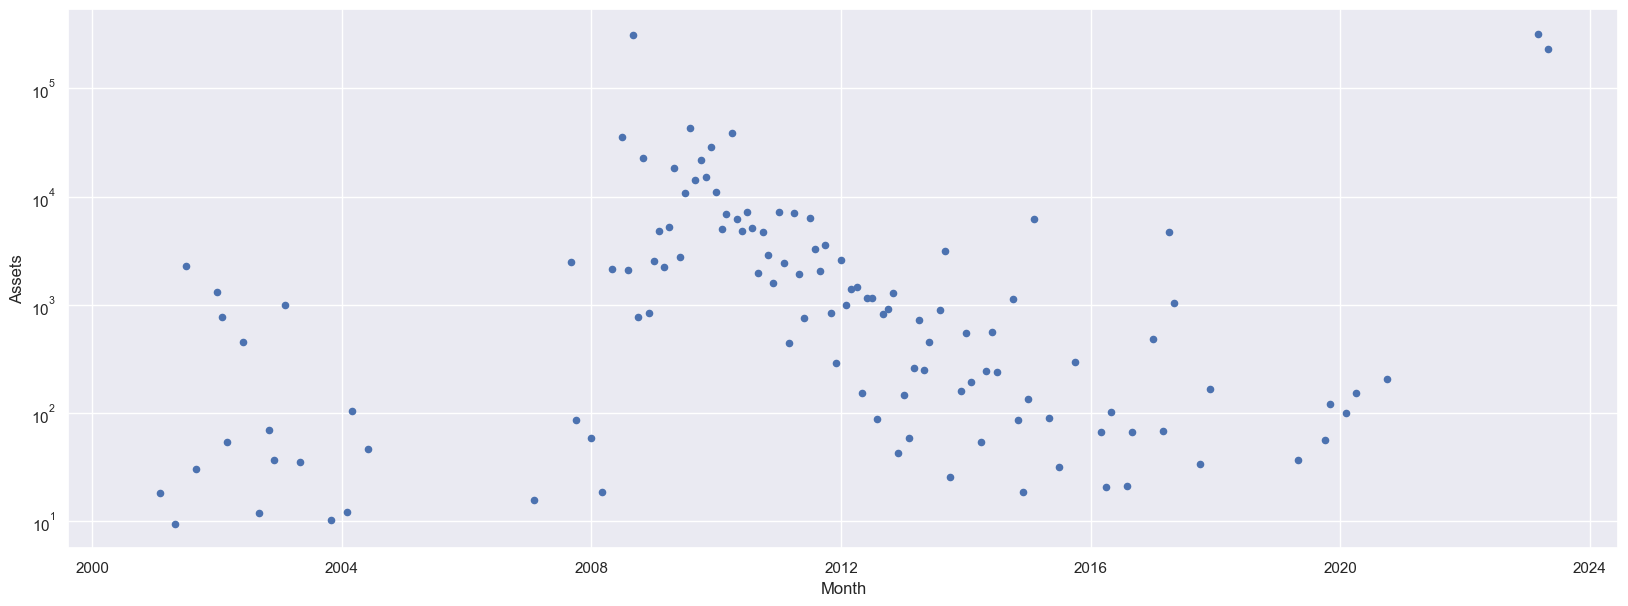

In [31]:
fig, ax = plt.subplots(figsize=(20, 7))

#fails = fails.reset_index()
fails.plot.scatter(ax=ax, x='Month', y='Assets', logy=True)
#fails.plot(ax=ax, x='Month', y='Deposits', logy=True)
plt.show()

- This plot looks a bit messy. We can try to do a cummulative sum per year, rather than per month instead. Let's use groupby method instead:

In [32]:
df = fails.copy()
df.Month = pd.to_datetime(df.Month)
df = df.groupby('Month').Assets.sum()
df = df.groupby(df.index.year).cumsum().reset_index()


In [33]:
df.head()

,Month,Assets
0,2000-10-01,0.0
1,2000-11-01,0.0
2,2000-12-01,0.0
3,2001-01-01,0.0
4,2001-02-01,18.4


In [35]:
fails_cum = pd.DataFrame(columns = ['year', 'Assets'])

years = [2000+j for j in range(23)]

for j in range(23):
    fails_cum.loc[j] = [years[j], df.loc[2+12*j].Assets]

fails_cum.loc[23] = [2023, df.loc[271].Assets]

In [36]:
fails_cum.tail()

,year,Assets
19,2019.0,214.1
20,2020.0,458.0
21,2021.0,0.0
22,2022.0,0.0
23,2023.0,548500.0


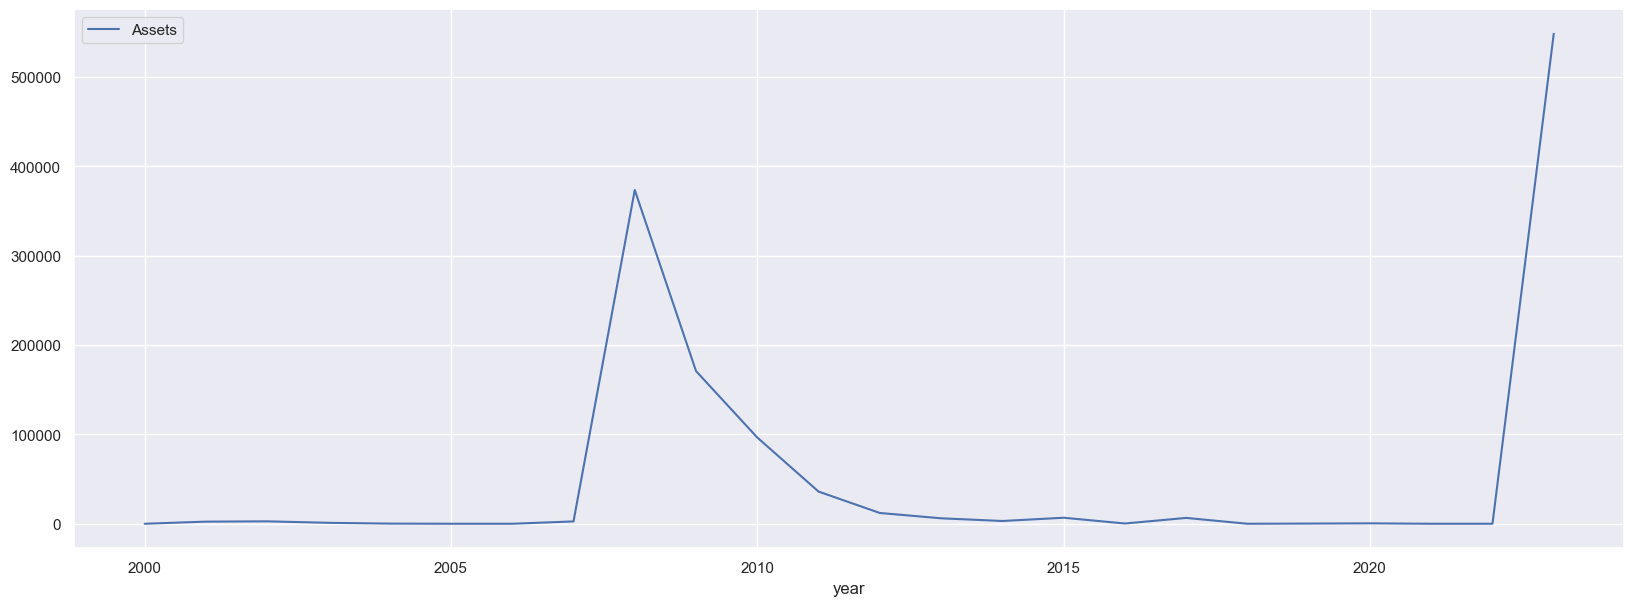

In [37]:
fig, ax = plt.subplots(figsize=(20, 7))

#fails = fails.reset_index()
fails_cum.plot(ax=ax, x='year', y='Assets')
#fails.plot(ax=ax, x='Month', y='Deposits', logy=True)
plt.show()

- Very nice! This is what we wanted! This graph by itself should look a bit scary already. Are we close to a new banking crisis? To get better results, one should also account for inflation, which will make this look slightly less worrying.
- We will add inflation below.

### US inflation data

Finally, let us also take into account the inflation. We take the data from: https://www.officialdata.org/us/inflation/1934?amount=1

In [90]:
inflation = pd.read_csv('inflation_data.csv')
inflation.head()

,year,amount,inflation rate
0,1934,1.00,0.03
1,1935,1.02,0.02
2,1936,1.04,0.01
3,1937,1.07,0.04
4,1938,1.05,-0.02


- The data tells us how much a dollar in 1934 would be worth in any other year.

In [95]:
inflation.tail(24)

,year,amount,inflation rate
66,2000,12.85,0.03
67,2001,13.22,0.03
68,2002,13.43,0.02
69,2003,13.73,0.02
70,2004,14.10,0.03
71,2005,14.57,0.03
72,2006,15.04,0.03
73,2007,15.47,0.03
74,2008,16.07,0.04
75,2009,16.01,-0.00


<Axes: xlabel='year'>

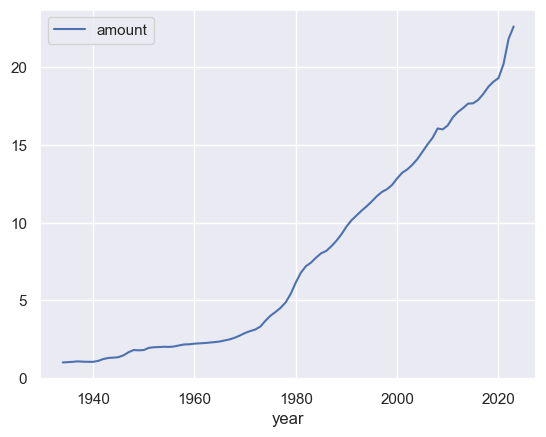

In [59]:
inflation.plot(x = 'year', y = 'amount')

In [92]:
fails_cum

,year,Assets
0,2000.0,0.0
1,2001.0,2358.6
2,2002.0,2705.4
3,2003.0,1045.2
4,2004.0,163.1
5,2005.0,0.0
6,2006.0,0.0
7,2007.0,2602.5
8,2008.0,373588.8
9,2009.0,170909.4


In [96]:
for j in range(66, 90):
    fails_cum.Assets[j-66] = fails_cum.Assets[j-66]/inflation.amount[j]

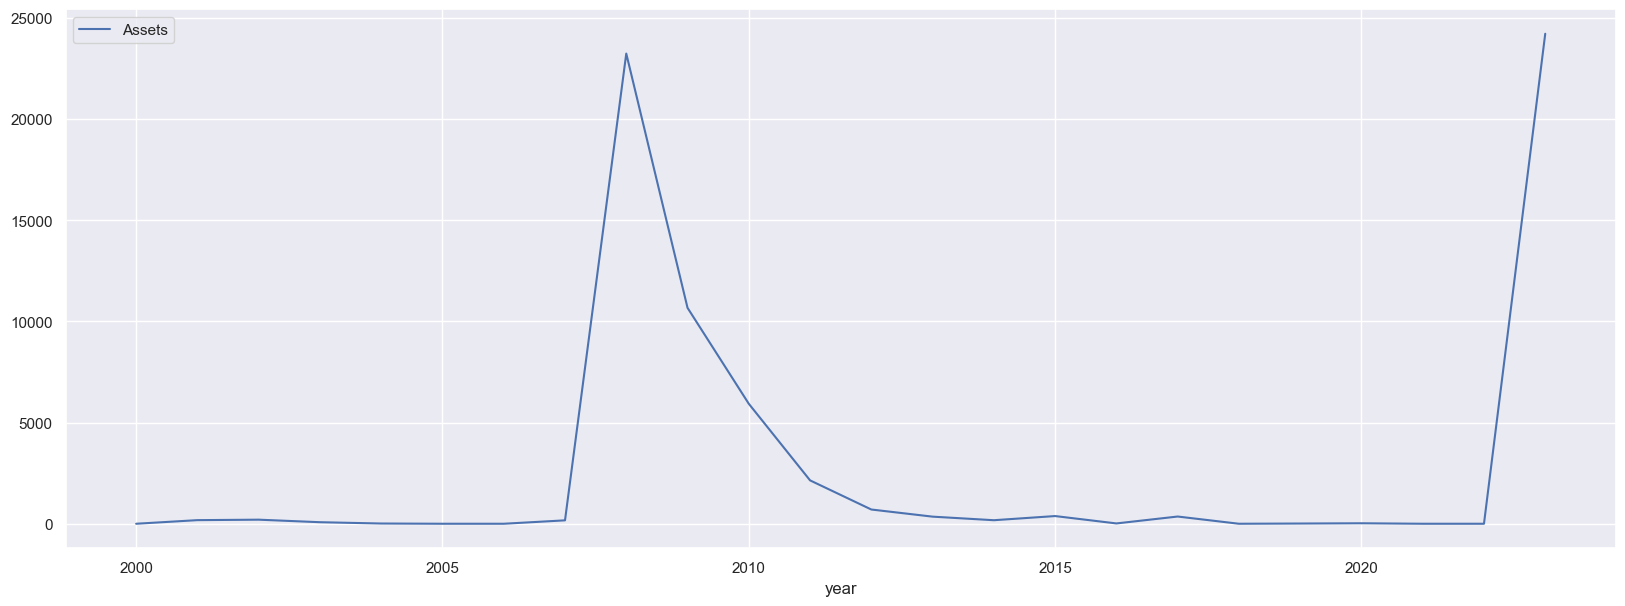

In [98]:
fig, ax = plt.subplots(figsize=(20, 7))

#fails = fails.reset_index()
fails_cum.plot(ax=ax, x='year', y='Assets')
#fails.plot(ax=ax, x='Month', y='Deposits', logy=True)
plt.show()

- Alright, we took into account inflation, but this is still looking scary! In fact, the 3 failed banks in 2023 are some of the largest US banks (FDIC insured) to every fail, even after takiinflation!

### Bank failures to 1934

- Let us repeat the above steps, but now take all the recorded data, which dates back to 1934.

In [76]:
bank_fail = pd.read_csv('Longbanklist.csv', encoding='windows-1252')
bank_fail.head()

,ï»¿CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,NaN,NM,"WEST MILWAUKEE, WI",NaN,06/04/1935,0,1,ANCHOR STATE BANK,891.0,718.0,FAILURE,PO,BIF
1,NaN,NM,"PRESIDIO, TX",NaN,11/18/1935,0,10,PRESIDIO VALLEY BANK,73.0,49.0,FAILURE,PO,BIF
2,NaN,NM,"ST. ONGE, SD",NaN,4/30/1937,0,100,ST. ONGE STATE BANK,81.0,61.0,FAILURE,PO,BIF
3,13797.0,NM,"TAYLOR, NE",1653.0,5/31/1985,2466,1000,BANK OF TAYLOR,14542.0,13360.0,FAILURE,PA,BIF
4,18388.0,NM,"FAIRFIELD, NE",1656.0,5/31/1985,6571,1001,FAIRFIELD STATE BANK,6795.0,6034.0,FAILURE,PO,BIF


In [77]:
bank_fail = bank_fail[['FAILDATE', 'NAME', 'QBFASSET', 'QBFDEP']]
bank_fail.head()

,FAILDATE,NAME,QBFASSET,QBFDEP
0,06/04/1935,ANCHOR STATE BANK,891.0,718.0
1,11/18/1935,PRESIDIO VALLEY BANK,73.0,49.0
2,4/30/1937,ST. ONGE STATE BANK,81.0,61.0
3,5/31/1985,BANK OF TAYLOR,14542.0,13360.0
4,5/31/1985,FAIRFIELD STATE BANK,6795.0,6034.0


In [78]:
bank_fail['Date'] = pd.to_datetime(bank_fail['FAILDATE'], format='%m/%d/%Y') # convert 'date' to actual date

In [79]:
bank_fail["Date"] = bank_fail.Date.dt.strftime('%Y')
bank_fail.head()

,FAILDATE,NAME,QBFASSET,QBFDEP,Date
0,06/04/1935,ANCHOR STATE BANK,891.0,718.0,1935
1,11/18/1935,PRESIDIO VALLEY BANK,73.0,49.0,1935
2,4/30/1937,ST. ONGE STATE BANK,81.0,61.0,1937
3,5/31/1985,BANK OF TAYLOR,14542.0,13360.0,1985
4,5/31/1985,FAIRFIELD STATE BANK,6795.0,6034.0,1985


In [80]:
bank_fail = bank_fail.sort_values(['Date'])
bank_fail = bank_fail.reset_index(drop=True)
bank_fail.head()

,FAILDATE,NAME,QBFASSET,QBFDEP,Date
0,11/16/1934,THE STATE BANK,195.0,170.0,1934
1,10/13/1934,PICKENS COUNTY BANK,243.0,210.0,1934
2,10/11/1934,FARMERS & TRADERS BANK,46.0,32.0,1934
3,9/13/1934,FARMERS STATE BANK OF BONGARDS,91.0,73.0,1934
4,08/06/1934,BANK OF LEWISPORT,81.0,68.0,1934


In [81]:
bank_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FAILDATE  4104 non-null   object 
 1   NAME      4104 non-null   object 
 2   QBFASSET  3950 non-null   float64
 3   QBFDEP    4102 non-null   float64
 4   Date      4104 non-null   object 
dtypes: float64(2), object(3)
memory usage: 160.4+ KB


In [82]:
bank_fail = bank_fail.replace(to_replace = np.nan, value = 0)

In [83]:
bank_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FAILDATE  4104 non-null   object 
 1   NAME      4104 non-null   object 
 2   QBFASSET  4104 non-null   float64
 3   QBFDEP    4104 non-null   float64
 4   Date      4104 non-null   object 
dtypes: float64(2), object(3)
memory usage: 160.4+ KB


In [84]:
bank_fail.tail()

,FAILDATE,NAME,QBFASSET,QBFDEP,Date
4099,5/31/2019,ENLOE STATE BANK,36738.0,31254.0,2019
4100,2/14/2020,ERICSON STATE BANK,100879.0,95159.0,2020
4101,04/03/2020,THE FIRST STATE BANK,151808.0,143102.0,2020
4102,10/16/2020,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,2020
4103,10/23/2020,ALMENA STATE BANK,65733.0,64941.0,2020


In [85]:
bank_per_year = pd.DataFrame({'Year': [bank_fail["Date"][0]], 'Number': [1], 'Assets': [bank_fail["QBFASSET"][0]], 'Deposits': [bank_fail["QBFDEP"][0]]})
bank_per_year

,Year,Number,Assets,Deposits
0,1934,1,195.0,170.0


In [86]:
count_unique = 1

for j in range(1, 4104):
    if bank_fail.Date[j] == bank_fail.Date[j-1]:
        bank_per_year.Number[count_unique-1] += 1
        bank_per_year.Assets[count_unique-1] += bank_fail["QBFASSET"][j]
        bank_per_year.Deposits[count_unique-1] += bank_fail["QBFDEP"][j]
    else:
        bank_per_year.loc[count_unique] = [bank_fail.Date[j], 1, bank_fail["QBFASSET"][j], bank_fail["QBFDEP"][j]]
        count_unique += 1

#bank_per_year[''] = pd.to_datetime(bank_per_month['Month'], format='%m/%y') # convert 'date' to actual date
#bank_per_month = bank_per_month.sort_values(['Month'])
# bank_per_month['Month'] = pd.DatetimeIndex(bank_per_month['Month']).normalize()
bank_per_year.head()

,Year,Number,Assets,Deposits
0,1934,9,2661.0,1966.0
1,1935,25,12324.0,13377.0
2,1936,69,12927.0,27762.0
3,1937,75,19284.0,32804.0
4,1938,74,13919.0,62064.0


In [89]:
bank_per_year.Assets[72]/1000000

1677.987474

In [49]:
bank_per_year.Assets = bank_per_year.Assets/1000000
bank_per_year.Deposits = bank_per_year.Deposits/1000000 # millions

In [50]:
bank_per_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      84 non-null     object 
 1   Number    84 non-null     int64  
 2   Assets    84 non-null     float64
 3   Deposits  84 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


- I realised that some entries are missing. In particular, the years 2005, 2006, 2018, 2021 and 2022 are the only five years when NO bank failures were recorded! Meanwhile, the dataset did not include the 3 failed banks from early 2023, so we add them manually.

In [51]:
ls = [[2005, 0, 0, 0], [2006, 0, 0, 0], [2018, 0, 0, 0], [2021, 0, 0, 0], [2022, 0, 0, 0], [2023, 3, 548500, 367900]]

for j in range(84, 84+6):
    bank_per_year.loc[j] = ls[j-84]

In [52]:
for j in range(84):
    bank_per_year.Year[j] = int(bank_per_year.Year[j])

In [53]:
bank_per_year = bank_per_year.sort_values(['Year'])
bank_per_year = bank_per_year.reset_index(drop=True)
bank_per_year.head()

,Year,Number,Assets,Deposits
0,1934,9,0.002661,0.001966
1,1935,25,0.012324,0.013377
2,1936,69,0.012927,0.027762
3,1937,75,0.019284,0.032804
4,1938,74,0.013919,0.062064


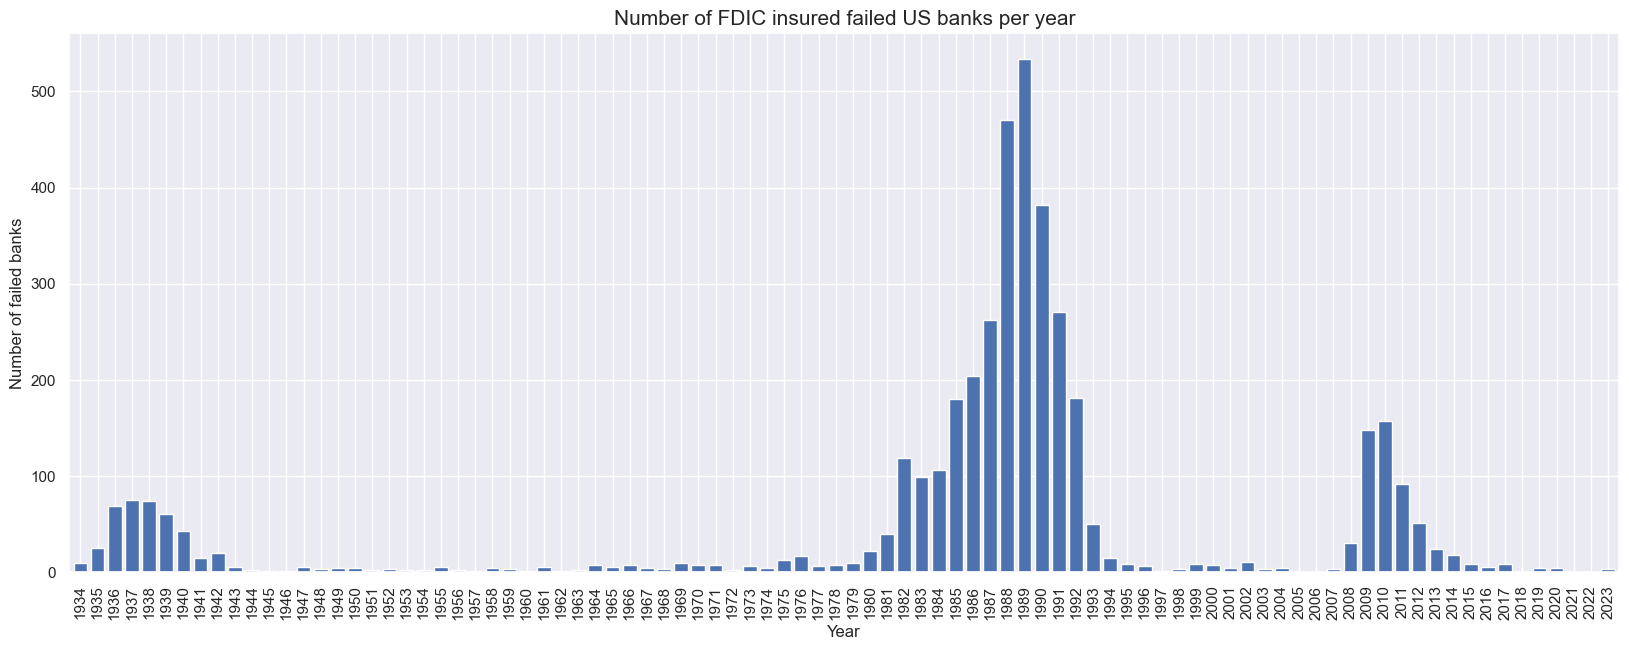

In [54]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(20, 7))

ax.xaxis.set_major_formatter(DateFormatter("%Y"))
bank_per_year.plot(ax = ax, x = 'Year', y = 'Number', kind='bar', width=0.8)
#plt.gca().invert_xaxis()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.set_xticks(np.arange(1934, 2023, 3))

#fig.autofmt_xdate()
ax.set_ylabel("Number of failed banks")
ax.set_title('Number of FDIC insured failed US banks per year', fontsize=15)
ax.get_legend().remove()
plt.show()

In [55]:
bank_per_year.tail()

,Year,Number,Assets,Deposits
85,2019,4,0.208767,0.190547
86,2020,4,0.454986,0.437138
87,2021,0,0.000000,0.000000
88,2022,0,0.000000,0.000000
89,2023,3,548500.000000,367900.000000
